# 7.4 动量法

In [28]:
%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
import torch

eta = 0.4
print(torch.__version__)

1.2.0+cpu


## 7.4.1 梯度下降的问题

epoch 20, x1 -0.943467, x2 -0.000073


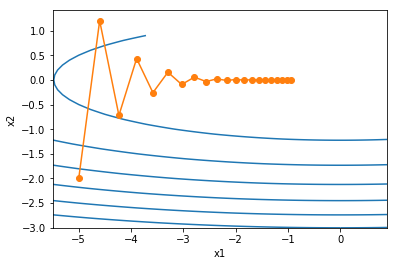

In [29]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.094460, x2 -398562977.904189


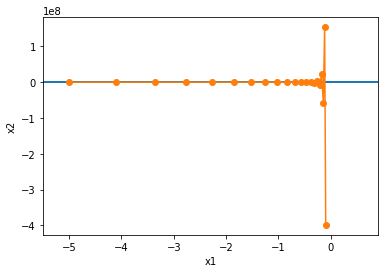

In [30]:
eta = 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

## 7.4.2 动量法

epoch 20, x1 -0.062843, x2 0.001202


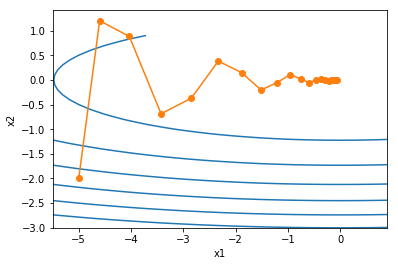

In [31]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.008036, x2 -0.001003


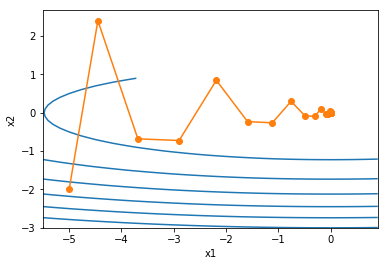

In [32]:
eta = 0.55
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

## 7.4.3 从零开始实现

In [33]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    v_b = torch.zeros(1, dtype=torch.float32)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v.data = hyperparams['momentum'] * v.data + hyperparams['lr'] * p.grad.data
        p.data -= v.data

loss: 0.244101, 0.059000 sec per epoch


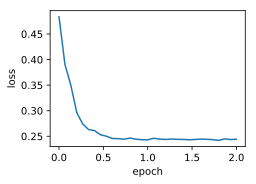

In [34]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.246418, 0.056000 sec per epoch


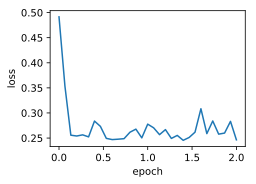

In [35]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.243159, 0.055000 sec per epoch


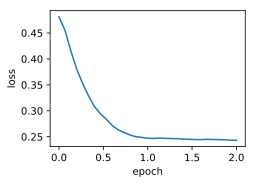

In [64]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.002, 'momentum': 0.9}, features, labels)

## 7.4.4 简洁实现

loss: 0.242300, 0.058000 sec per epoch


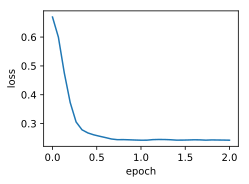

In [75]:
d2l.train_pytorch_ch7(torch.optim.SGD, {'lr': 0.003, 'momentum': 0.9},
                    features, labels)